In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
os.getenv('HOME')

'/export/home/extragal/erossi'

In [2]:
work_dir='/export/home/extragal/zibetti/no_ownCloud/SteMaGE/data/SEDlibraries/Sandage_v4.1_Zfix_noburst_cb16MILES_1M/'
par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_001_physpar_wagef.fits'


In [3]:
hdul_par=fits.open(par_file)

age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']

n_chunks=5
for i_chunks in range(2, n_chunks+1):
    _par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_{:03d}_physpar_wagef.fits'
    _hdul_par=fits.open(_par_file.format(i_chunks))

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)    
    

In [4]:
bins=83
bin_age50=np.histogram(np.log10(age50), bins=bins, range=(6.0, 10.15))[1]
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    

In [5]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794
Z=[z32,z42,z52,z62,z72]
bin_z=np.histogram(Z, bins=5)[1]
x,y=np.meshgrid(bin_age50, bin_z)

Text(0.5, 1.0, 'time resolution SNR500 (d1090n50) col')

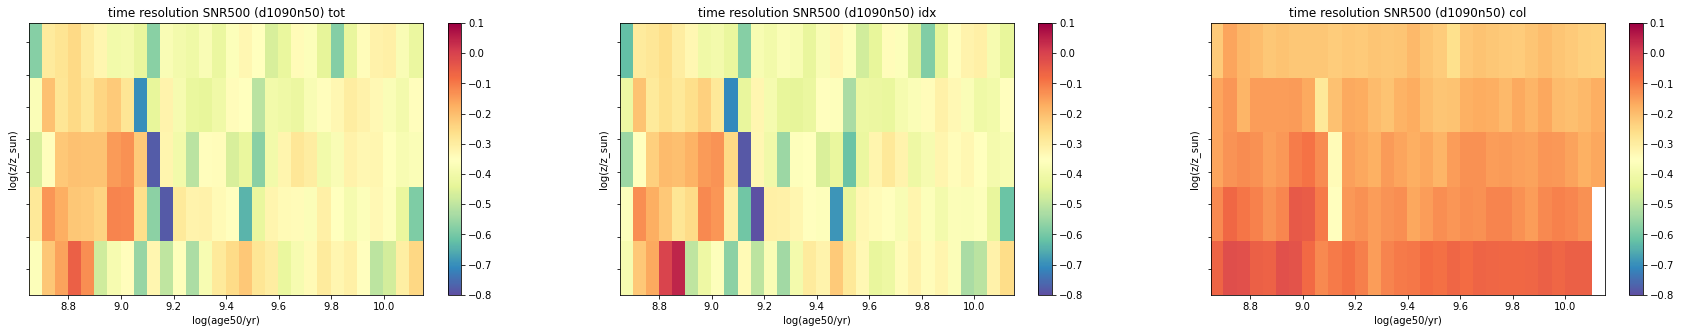

In [6]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR500_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot500=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot500=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot500=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot500=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot500=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR500_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx500=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx500=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx500=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx500=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx500=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR500_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col500=table_t_res_col['Log_d1090n50_min_z32']
t_42_col500=table_t_res_col['Log_d1090n50_min_z42']
t_52_col500=table_t_res_col['Log_d1090n50_min_z52']
t_62_col500=table_t_res_col['Log_d1090n50_min_z62']
t_72_col500=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot500, t_42_tot500, t_52_tot500, t_62_tot500, t_72_tot500],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx500, t_42_idx500, t_52_idx500, t_62_idx500, t_72_idx500],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col500, t_42_col500, t_52_col500, t_62_col500, t_72_col500],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR500 (d1090n50) tot')
ax[1].set_title('time resolution SNR500 (d1090n50) idx')
ax[2].set_title('time resolution SNR500 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR200 (d1090n50) col')

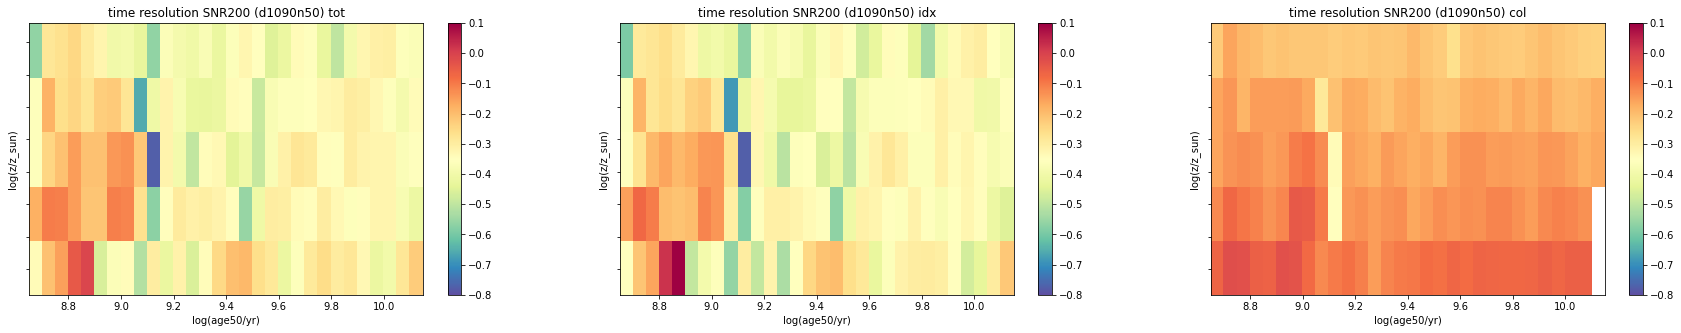

In [7]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR200_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot200=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot200=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot200=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot200=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot200=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR200_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx200=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx200=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx200=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx200=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx200=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR200_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col200=table_t_res_col['Log_d1090n50_min_z32']
t_42_col200=table_t_res_col['Log_d1090n50_min_z42']
t_52_col200=table_t_res_col['Log_d1090n50_min_z52']
t_62_col200=table_t_res_col['Log_d1090n50_min_z62']
t_72_col200=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot200, t_42_tot200, t_52_tot200, t_62_tot200, t_72_tot200],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx200, t_42_idx200, t_52_idx200, t_62_idx200, t_72_idx200],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col200, t_42_col200, t_52_col200, t_62_col200, t_72_col200],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR200 (d1090n50) tot')
ax[1].set_title('time resolution SNR200 (d1090n50) idx')
ax[2].set_title('time resolution SNR200 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR100 (d1090n50) col')

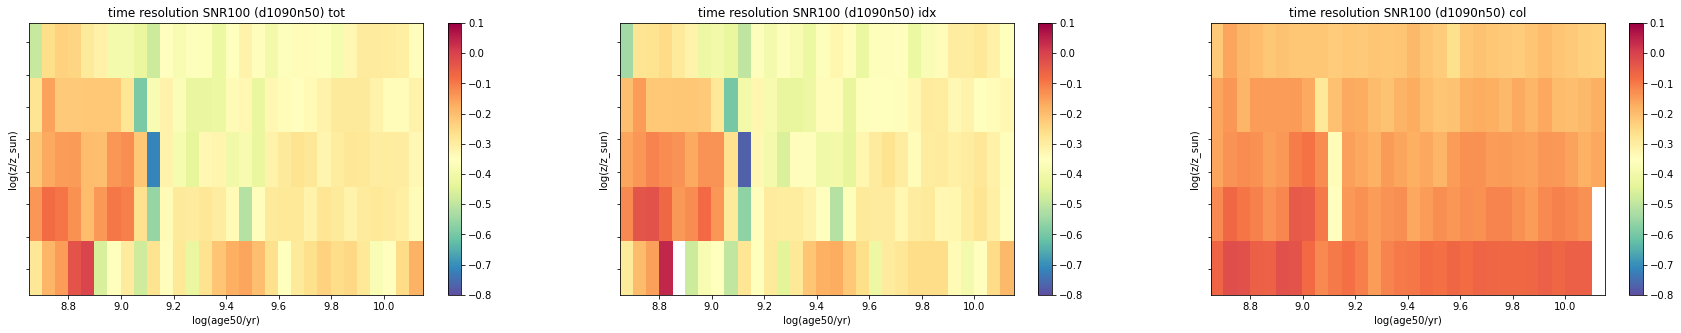

In [8]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR100_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot100=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot100=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot100=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot100=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot100=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR100_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx100=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx100=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx100=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx100=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx100=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR100_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col100=table_t_res_col['Log_d1090n50_min_z32']
t_42_col100=table_t_res_col['Log_d1090n50_min_z42']
t_52_col100=table_t_res_col['Log_d1090n50_min_z52']
t_62_col100=table_t_res_col['Log_d1090n50_min_z62']
t_72_col100=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot100, t_42_tot100, t_52_tot100, t_62_tot100, t_72_tot100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx100, t_42_idx100, t_52_idx100, t_62_idx100, t_72_idx100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col100, t_42_col100, t_52_col100, t_62_col100, t_72_col100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR100 (d1090n50) tot')
ax[1].set_title('time resolution SNR100 (d1090n50) idx')
ax[2].set_title('time resolution SNR100 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR50 (d1090n50) col')

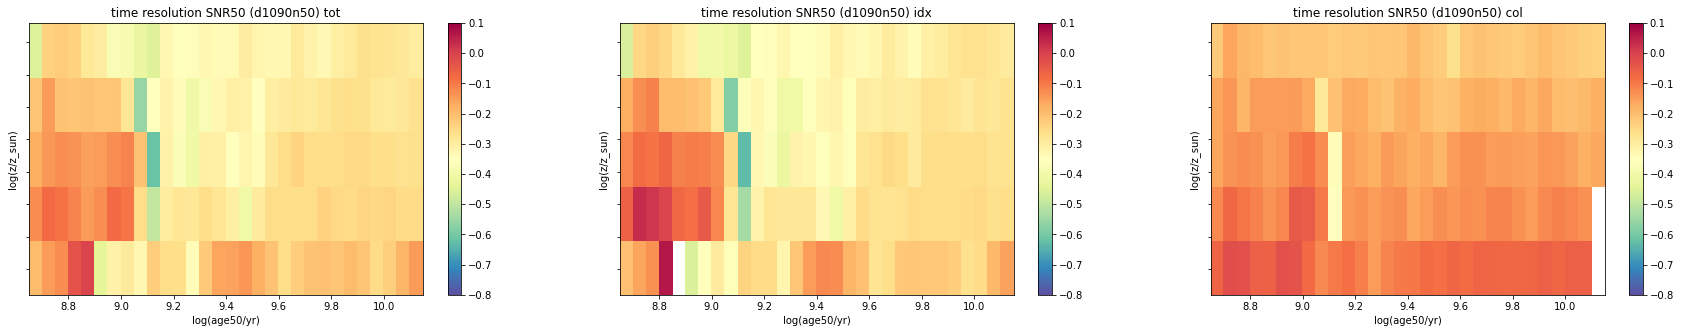

In [9]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR50_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot50=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot50=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot50=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot50=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot50=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR50_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx50=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx50=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx50=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx50=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx50=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR50_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col50=table_t_res_col['Log_d1090n50_min_z32']
t_42_col50=table_t_res_col['Log_d1090n50_min_z42']
t_52_col50=table_t_res_col['Log_d1090n50_min_z52']
t_62_col50=table_t_res_col['Log_d1090n50_min_z62']
t_72_col50=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot50, t_42_tot50, t_52_tot50, t_62_tot50, t_72_tot50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx50, t_42_idx50, t_52_idx50, t_62_idx50, t_72_idx50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col50, t_42_col50, t_52_col50, t_62_col50, t_72_col50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR50 (d1090n50) tot')
ax[1].set_title('time resolution SNR50 (d1090n50) idx')
ax[2].set_title('time resolution SNR50 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR20 (d1090n50) col')

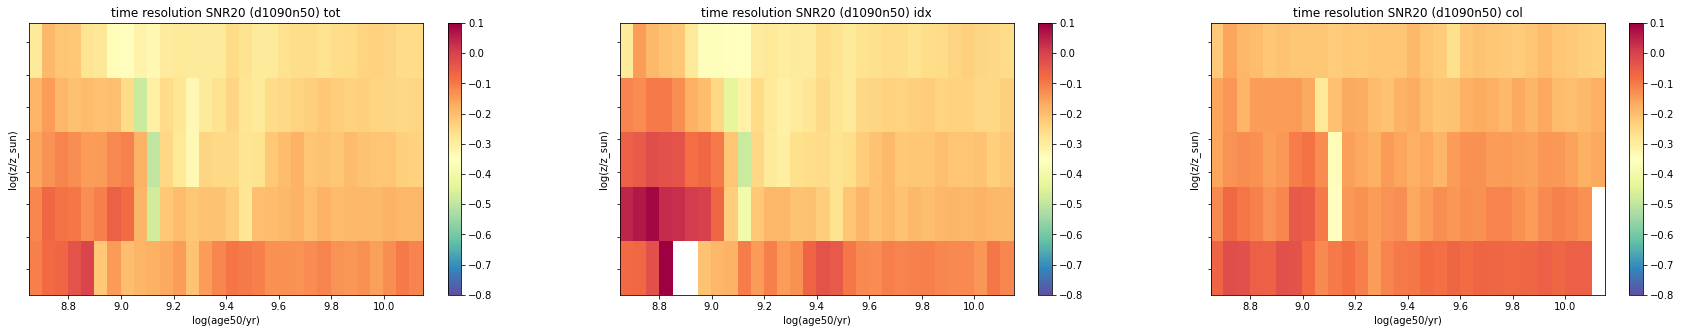

In [10]:
time_res_file_tot=work_dir+'Time_resol_Zfix_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col=table_t_res_col['Log_d1090n50_min_z32']
t_42_col=table_t_res_col['Log_d1090n50_min_z42']
t_52_col=table_t_res_col['Log_d1090n50_min_z52']
t_62_col=table_t_res_col['Log_d1090n50_min_z62']
t_72_col=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot, t_42_tot, t_52_tot, t_62_tot, t_72_tot],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx, t_42_idx, t_52_idx, t_62_idx, t_72_idx],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col, t_42_col, t_52_col, t_62_col, t_72_col],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR20 (d1090n50) tot')
ax[1].set_title('time resolution SNR20 (d1090n50) idx')
ax[2].set_title('time resolution SNR20 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR10 (d1090n50) col')

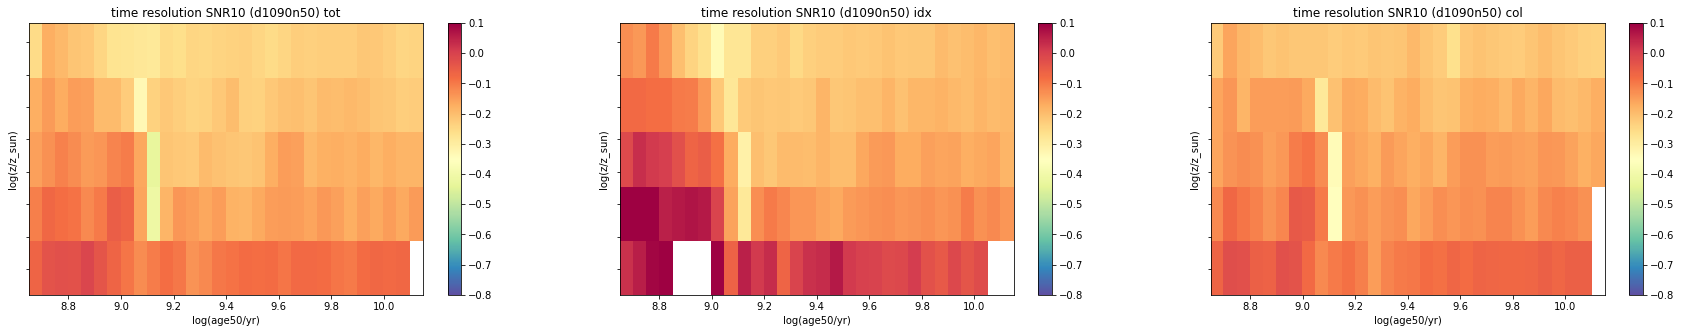

In [11]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR10_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot10=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot10=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot10=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot10=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot10=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR10_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx10=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx10=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx10=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx10=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx10=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR10_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col10=table_t_res_col['Log_d1090n50_min_z32']
t_42_col10=table_t_res_col['Log_d1090n50_min_z42']
t_52_col10=table_t_res_col['Log_d1090n50_min_z52']
t_62_col10=table_t_res_col['Log_d1090n50_min_z62']
t_72_col10=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot10, t_42_tot10, t_52_tot10, t_62_tot10, t_72_tot10],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx10, t_42_idx10, t_52_idx10, t_62_idx10, t_72_idx10],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col10, t_42_col10, t_52_col10, t_62_col10, t_72_col10],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR10 (d1090n50) tot')
ax[1].set_title('time resolution SNR10 (d1090n50) idx')
ax[2].set_title('time resolution SNR10 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR5 (d1090n50) col')

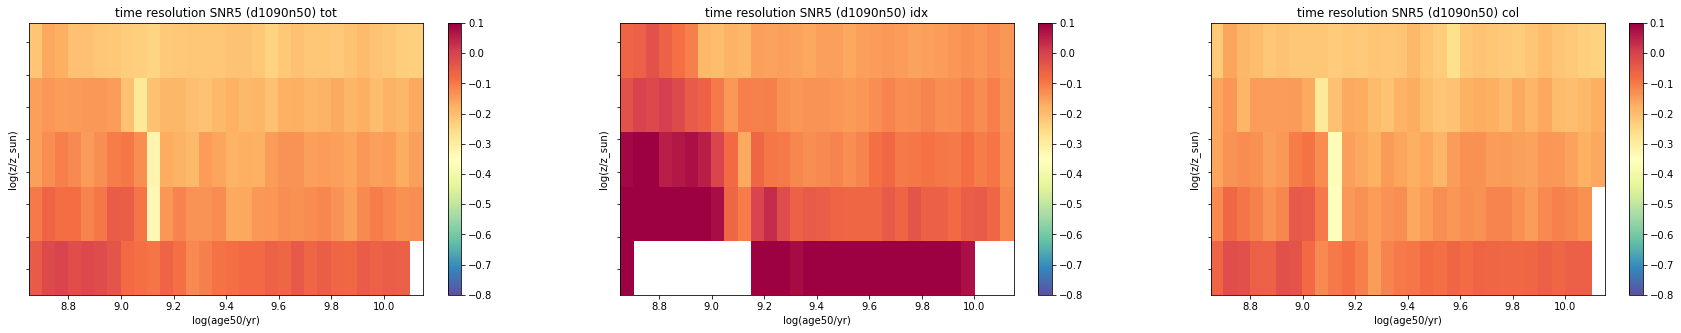

In [12]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR5_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot5=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot5=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot5=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot5=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot5=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR5_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx5=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx5=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx5=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx5=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx5=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR5_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col5=table_t_res_col['Log_d1090n50_min_z32']
t_42_col5=table_t_res_col['Log_d1090n50_min_z42']
t_52_col5=table_t_res_col['Log_d1090n50_min_z52']
t_62_col5=table_t_res_col['Log_d1090n50_min_z62']
t_72_col5=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot5, t_42_tot5, t_52_tot5, t_62_tot5, t_72_tot5],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx5, t_42_idx5, t_52_idx5, t_62_idx5, t_72_idx5],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col5, t_42_col5, t_52_col5, t_62_col5, t_72_col5],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR5 (d1090n50) tot')
ax[1].set_title('time resolution SNR5 (d1090n50) idx')
ax[2].set_title('time resolution SNR5 (d1090n50) col')


Text(0, 0.5, 'time resol (d1090n50 min)')

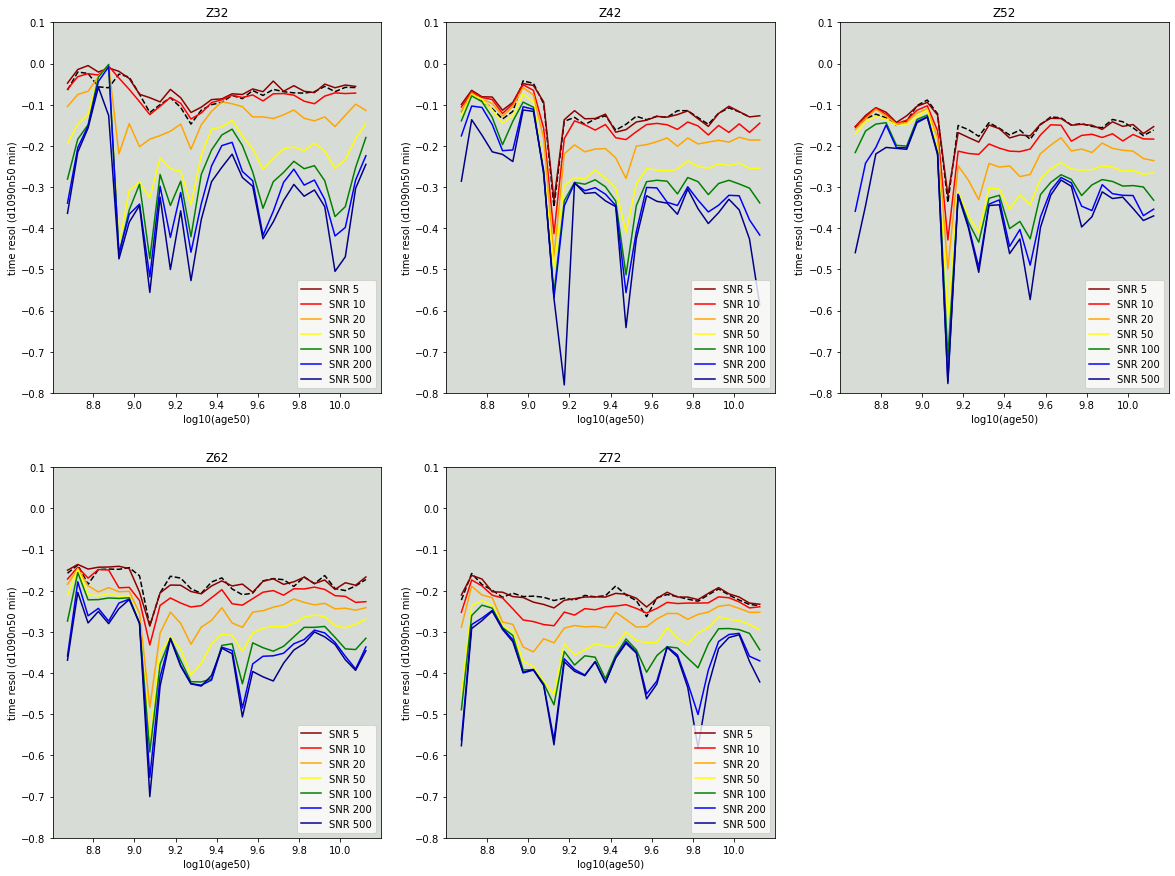

In [13]:
fig, axs=plt.subplots(2,3, figsize=(20,15))
axs[1,2].axis('off')

axs[0,0].plot(age50_binned, t_32_col5,'--', color='black')
axs[0,0].plot(age50_binned, t_32_tot5, label='SNR 5', color='darkred')
axs[0,0].plot(age50_binned, t_32_tot10, label='SNR 10',color='red')
axs[0,0].plot(age50_binned, t_32_tot, label='SNR 20', color='orange')
axs[0,0].plot(age50_binned, t_32_tot50, label='SNR 50', color='yellow')
axs[0,0].plot(age50_binned, t_32_tot100, label='SNR 100', color='green')
axs[0,0].plot(age50_binned, t_32_tot200, label='SNR 200', color='blue')
axs[0,0].plot(age50_binned, t_32_tot500, label='SNR 500', color='darkblue')

axs[0,0].set_facecolor('#d8dcd6')

axs[0,0].legend(loc='lower right')
axs[0,0].set_title('Z32')
axs[0,0].set_ylim([-0.8, 0.1])
axs[0,0].set_xlabel('log10(age50)')
axs[0,0].set_ylabel('time resol (d1090n50 min)')

axs[0,1].plot(age50_binned, t_42_col5,'--', color='black')
axs[0,1].plot(age50_binned, t_42_tot5, label='SNR 5', color='darkred')
axs[0,1].plot(age50_binned, t_42_tot10, label='SNR 10',color='red')
axs[0,1].plot(age50_binned, t_42_tot, label='SNR 20', color='orange')
axs[0,1].plot(age50_binned, t_42_tot50, label='SNR 50', color='yellow')
axs[0,1].plot(age50_binned, t_42_tot100, label='SNR 100', color='green')
axs[0,1].plot(age50_binned, t_42_tot200, label='SNR 200', color='blue')
axs[0,1].plot(age50_binned, t_42_tot500, label='SNR 500', color='darkblue')

axs[0,1].set_facecolor('#d8dcd6')

axs[0,1].legend(loc='lower right')
axs[0,1].set_title('Z42')
axs[0,1].set_ylim([-0.8, 0.1])
axs[0,1].set_xlabel('log10(age50)')
axs[0,1].set_ylabel('time resol (d1090n50 min)')

axs[0,2].plot(age50_binned, t_52_col5,'--', color='black')
axs[0,2].plot(age50_binned, t_52_tot5, label='SNR 5', color='darkred')
axs[0,2].plot(age50_binned, t_52_tot10, label='SNR 10',color='red')
axs[0,2].plot(age50_binned, t_52_tot, label='SNR 20', color='orange')
axs[0,2].plot(age50_binned, t_52_tot50, label='SNR 50', color='yellow')
axs[0,2].plot(age50_binned, t_52_tot100, label='SNR 100', color='green')
axs[0,2].plot(age50_binned, t_52_tot200, label='SNR 200', color='blue')
axs[0,2].plot(age50_binned, t_52_tot500, label='SNR 500', color='darkblue')

axs[0,2].set_facecolor('#d8dcd6')

axs[0,2].legend(loc='lower right')
axs[0,2].set_title('Z52')
axs[0,2].set_ylim([-0.8, 0.1])
axs[0,2].set_xlabel('log10(age50)')
axs[0,2].set_ylabel('time resol (d1090n50 min)')

axs[1,0].plot(age50_binned, t_62_col5,'--', color='black')
axs[1,0].plot(age50_binned, t_62_tot5, label='SNR 5', color='darkred')
axs[1,0].plot(age50_binned, t_62_tot10, label='SNR 10',color='red')
axs[1,0].plot(age50_binned, t_62_tot, label='SNR 20', color='orange')
axs[1,0].plot(age50_binned, t_62_tot50, label='SNR 50', color='yellow')
axs[1,0].plot(age50_binned, t_62_tot100, label='SNR 100', color='green')
axs[1,0].plot(age50_binned, t_62_tot200, label='SNR 200', color='blue')
axs[1,0].plot(age50_binned, t_62_tot500, label='SNR 500', color='darkblue')

axs[1,0].set_facecolor('#d8dcd6')

axs[1,0].legend(loc='lower right')
axs[1,0].set_title('Z62')
axs[1,0].set_ylim([-0.8, 0.1])
axs[1,0].set_xlabel('log10(age50)')
axs[1,0].set_ylabel('time resol (d1090n50 min)')

axs[1,1].plot(age50_binned, t_72_col5,'--', color='black')
axs[1,1].plot(age50_binned, t_72_tot5, label='SNR 5', color='darkred')
axs[1,1].plot(age50_binned, t_72_tot10, label='SNR 10', color='red')
axs[1,1].plot(age50_binned, t_72_tot, label='SNR 20', color='orange')
axs[1,1].plot(age50_binned, t_72_tot50, label='SNR 50', color='yellow')
axs[1,1].plot(age50_binned, t_72_tot100, label='SNR 100', color='green')
axs[1,1].plot(age50_binned, t_72_tot200, label='SNR 200', color='blue')
axs[1,1].plot(age50_binned, t_72_tot500, label='SNR 500', color='darkblue')

axs[1,1].set_facecolor('#d8dcd6')

axs[1,1].legend(loc='lower right')
axs[1,1].set_title('Z72')
axs[1,1].set_ylim([-0.8, 0.1])
axs[1,1].set_xlabel('log10(age50)')
axs[1,1].set_ylabel('time resol (d1090n50 min)')

In [14]:
#fig.savefig('/home/edoardo/Desktop/t_res.png')

Text(0.5, 1.0, 'time resolution SNR20 (d1090n50) col')

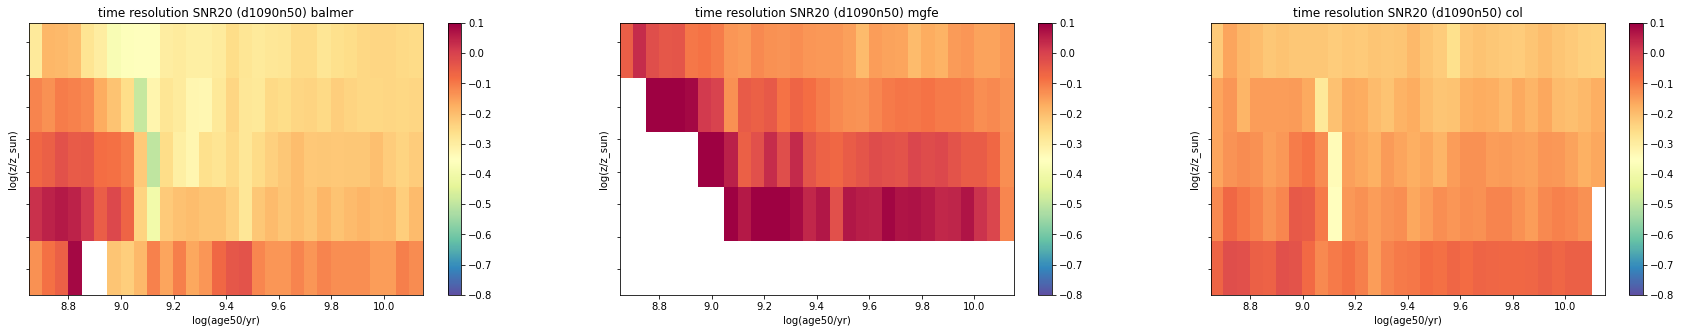

In [18]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR20_balmer.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR20_mgfe.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col=table_t_res_col['Log_d1090n50_min_z32']
t_42_col=table_t_res_col['Log_d1090n50_min_z42']
t_52_col=table_t_res_col['Log_d1090n50_min_z52']
t_62_col=table_t_res_col['Log_d1090n50_min_z62']
t_72_col=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot, t_42_tot, t_52_tot, t_62_tot, t_72_tot],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx, t_42_idx, t_52_idx, t_62_idx, t_72_idx],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col, t_42_col, t_52_col, t_62_col, t_72_col],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR20 (d1090n50) balmer')
ax[1].set_title('time resolution SNR20 (d1090n50) mgfe')
ax[2].set_title('time resolution SNR20 (d1090n50) col')


In [19]:
#fig.savefig('/home/edoardo/Desktop/t_res_balmer_snr20.png')

Text(0.5, 1.0, 'time resolution SNR100 (d1090n50) col')

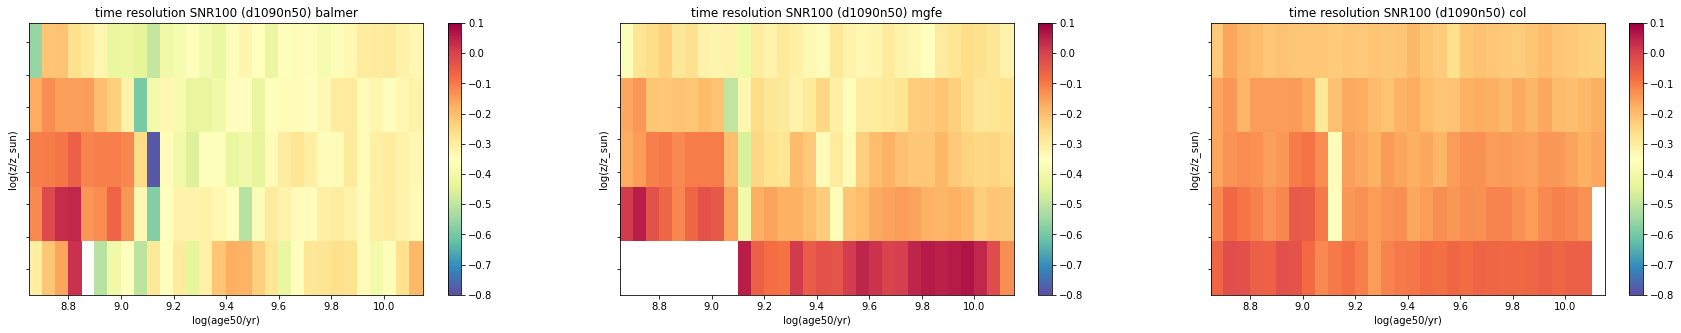

In [20]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR100_balmer.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR100_mgfe.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR100_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col=table_t_res_col['Log_d1090n50_min_z32']
t_42_col=table_t_res_col['Log_d1090n50_min_z42']
t_52_col=table_t_res_col['Log_d1090n50_min_z52']
t_62_col=table_t_res_col['Log_d1090n50_min_z62']
t_72_col=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot, t_42_tot, t_52_tot, t_62_tot, t_72_tot],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx, t_42_idx, t_52_idx, t_62_idx, t_72_idx],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col, t_42_col, t_52_col, t_62_col, t_72_col],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR100 (d1090n50) balmer')
ax[1].set_title('time resolution SNR100 (d1090n50) mgfe')
ax[2].set_title('time resolution SNR100 (d1090n50) col')


In [21]:
#fig.savefig('/home/edoardo/Desktop/t_res_balmer_snr100.png')

Text(0.5, 1.0, 'time resolution SNR500 (d1090n50) col')

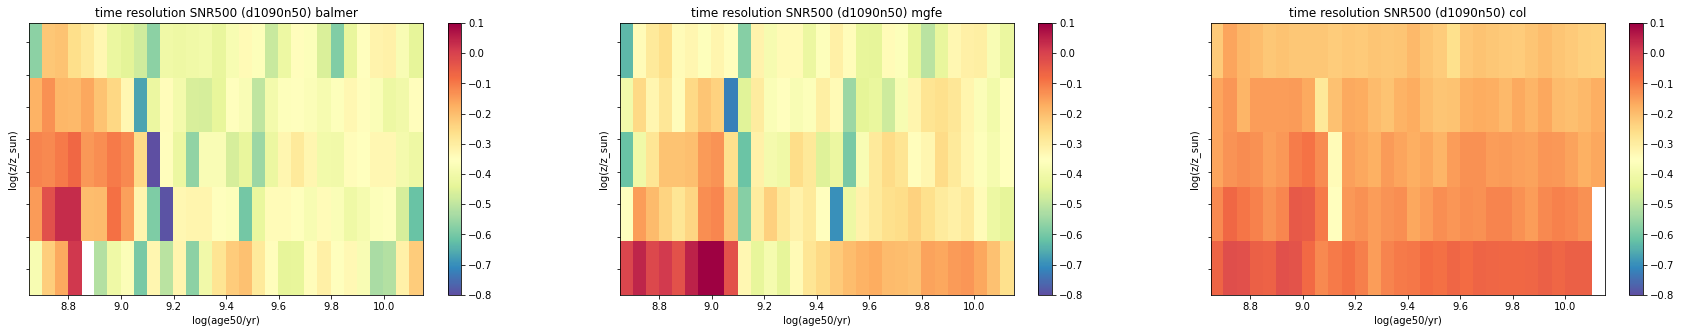

In [22]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR500_balmer.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR500_mgfe.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR500_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col=table_t_res_col['Log_d1090n50_min_z32']
t_42_col=table_t_res_col['Log_d1090n50_min_z42']
t_52_col=table_t_res_col['Log_d1090n50_min_z52']
t_62_col=table_t_res_col['Log_d1090n50_min_z62']
t_72_col=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot, t_42_tot, t_52_tot, t_62_tot, t_72_tot],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx, t_42_idx, t_52_idx, t_62_idx, t_72_idx],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col, t_42_col, t_52_col, t_62_col, t_72_col],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR500 (d1090n50) balmer')
ax[1].set_title('time resolution SNR500 (d1090n50) mgfe')
ax[2].set_title('time resolution SNR500 (d1090n50) col')


In [23]:
#fig.savefig('/home/edoardo/Desktop/t_res_balmer_snr500.png')